# **Data Loading of Built-in Dataset**

In [34]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [24]:

# Load the Breast Cancer dataset
cancer_data = load_breast_cancer(as_frame=True)
df = cancer_data.frame

# Display the first few rows to understand the data
print("Initial DataFrame:")
print(df.head())


Initial DataFrame:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst are

# **Data Preprocessing**

In [25]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Scaling/Normalizing numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns='target'))

# Convert scaled features back to DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])

# Add the target column back to the DataFrame
scaled_df['target'] = df['target']

# Display the first few rows of the scaled DataFrame
print("\nScaled DataFrame:")
print(scaled_df.head())


Missing Values:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

Scaled DataFrame:
   mean radius  mean texture  mean perimeter  mean a

In [26]:
# Separate features and target
X = df.drop(columns='target')
y = df['target']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the features and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Add the target column back to the DataFrame
scaled_df = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)
scaled_df.columns = list(X.columns) + ['target']

# Display the first few rows of the scaled DataFrame
print("\nScaled DataFrame:")
print(scaled_df.head())


Scaled DataFrame:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   mean fractal dimension  ...  worst texture  worst perimeter  worst are

# **Data Splitting**

In [27]:

# Separate features and target
X = scaled_df.drop(columns='target')
y = scaled_df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training set features shape:", X_train.shape)
print("Testing set features shape:", X_test.shape)
print("Training set target shape:", y_train.shape)
print("Testing set target shape:", y_test.shape)


Training set features shape: (455, 30)
Testing set features shape: (114, 30)
Training set target shape: (455,)
Testing set target shape: (114,)


# **Model Selection**

In [28]:
#1. Logistic Regression

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Model Performance:
Accuracy: 0.9736842105263158

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [29]:
#2.SVM

# Initialize the SVM model
svm = SVC(kernel='linear', random_state=42)  # You can try other kernels like 'rbf', 'poly', etc.

# Train the model on the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm.predict(X_test)

# Evaluate the model
print("SVM Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Model Performance:
Accuracy: 0.956140350877193

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



# **Model Evaluation**

Logistic Regression Model Performance:
Accuracy: 0.9736842105263158
Precision (macro): 0.9742063492063492
Recall (macro): 0.9697019325253848
F1 Score (macro): 0.97186343068696
ROC AUC Score: 0.969701932525385
SVM Model Performance:
Accuracy: 0.956140350877193
Precision (macro): 0.9516233766233766
Recall (macro): 0.9556174254831313
F1 Score (macro): 0.9535338713621913
ROC AUC Score: 0.9556174254831314


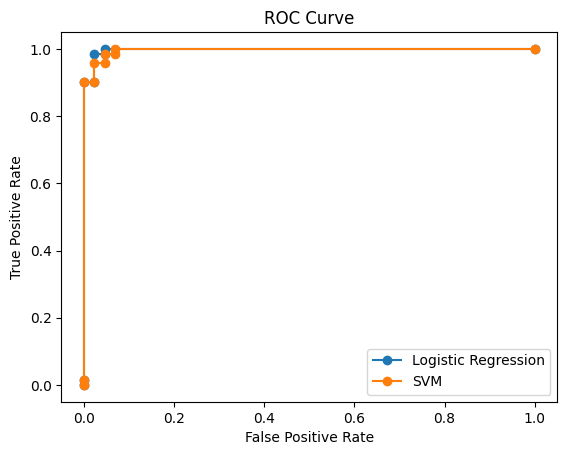

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the Logistic Regression model
print("Logistic Regression Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Precision (macro):", precision_score(y_test, y_pred_log_reg, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_log_reg, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred_log_reg, average='macro'))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_log_reg))

# Plot ROC curve
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
plt.plot(fpr_log_reg, tpr_log_reg, marker='o', label='Logistic Regression')


# Initialize and train the SVM model
svm = SVC(kernel='linear', probability=True, random_state=42)  # Set probability=True for ROC AUC
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Evaluate the SVM model
print("SVM Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision (macro):", precision_score(y_test, y_pred_svm, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_svm, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred_svm, average='macro'))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_svm))

# Plot ROC curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm.decision_function(X_test))
plt.plot(fpr_svm, tpr_svm, marker='o', label='SVM')

# Finalize the ROC curve plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



# **Cross Validation**

In [31]:
from sklearn.model_selection import cross_val_score

# Function for cross-validation
def cross_validate_model(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    print(f"{model.__class__.__name__} Cross-Validation Scores:")
    print("Accuracy Scores:", scores)
    print("Mean Accuracy:", scores.mean())
    print("Standard Deviation:", scores.std())

# Cross-validate Logistic Regression
cross_validate_model(log_reg, X, y)

# Cross-validate SVM
cross_validate_model(svm, X, y)


LogisticRegression Cross-Validation Scores:
Accuracy Scores: [0.98245614 0.98245614 0.97368421 0.97368421 0.99115044]
Mean Accuracy: 0.9806862288464524
Standard Deviation: 0.006539441283506109
SVC Cross-Validation Scores:
Accuracy Scores: [0.95614035 0.98245614 0.96491228 0.96491228 0.98230088]
Mean Accuracy: 0.9701443875174661
Standard Deviation: 0.010490210803241348


# **Hyperparameter Tuning**

In [40]:
from sklearn.model_selection import GridSearchCV
# Define parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Type of kernel
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Initialize SVM model
svm = SVC(probability=True, random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_scaled, y)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)




Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.9771774569166279
